In [1]:
import os
import pandas as pd
from tifffile import imread

from scportrait.pipeline.project import Project
from scportrait.pipeline.segmentation.workflows import NuclearExpansionSegmentationCellpose
from scportrait.pipeline.extraction import HDF5CellExtraction
from scportrait.pipeline.featurization import CellFeaturizer

px_resolution = 0.5085184

/Users/sophia/mambaforge/envs/scportrait/lib/python3.11/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [2]:
project_id = 1
input_data = "../processed_data"
config_path = "../config_CODEX.yml"

In [3]:
# initialize the project
project_location = f"{input_data}/scportrait_project_codex_region{project_id}"
project = Project(os.path.abspath(project_location),
                config_path= config_path,
                overwrite=True,
                debug=True,
                segmentation_f=NuclearExpansionSegmentationCellpose,
                extraction_f=HDF5CellExtraction,
                featurization_f=CellFeaturizer
                )

version mismatch: detected: RasterFormatV02, requested: FormatV04


Updating project config file.
[10/09/2025 15:06:48] Loading config from /Users/sophia/Documents/GitHub/scportrait_manuscript/input_data/CODEX_tonsil_healthy_tonsilitis/processed_data/scportrait_project_codex_region1/config.yml
3
[10/09/2025 15:06:48] No cache directory specified in config using current working directory /Users/sophia/Documents/GitHub/scportrait_manuscript/input_data/CODEX_tonsil_healthy_tonsilitis/processing_notebooks.
[10/09/2025 15:06:48] Compression algorithm for extracted single-cell images: lzf


In [4]:
# load channel names
channel_names = pd.read_csv(f"{input_data}/channelnames.txt", header=None)
channel_names = channel_names[0].to_list()

# load images to array
image = imread(f"{input_data}/codex_tissue_areas/tissue_region_{project_id}.tif")

# add to scportrait project
project.load_input_from_array(image, channel_names=channel_names)

[10/09/2025 15:06:48] Output location /Users/sophia/Documents/GitHub/scportrait_manuscript/input_data/CODEX_tonsil_healthy_tonsilitis/processed_data/scportrait_project_codex_region1/scportrait.sdata already exists. Overwriting.
INFO     The Zarr backing store has been changed from None the new file path:                                      
         /Users/sophia/Documents/GitHub/scportrait_manuscript/input_data/CODEX_tonsil_healthy_tonsilitis/processed_
         data/scportrait_project_codex_region1/scportrait.sdata                                                    


version mismatch: detected: RasterFormatV02, requested: FormatV04
version mismatch: detected: RasterFormatV02, requested: FormatV04
version mismatch: detected: RasterFormatV02, requested: FormatV04
version mismatch: detected: RasterFormatV02, requested: FormatV04


[10/09/2025 15:06:49] Image input_image written to sdata object.


In [5]:
project.segment()

version mismatch: detected: RasterFormatV02, requested: FormatV04
version mismatch: detected: RasterFormatV02, requested: FormatV04
version mismatch: detected: RasterFormatV02, requested: FormatV04


[10/09/2025 15:06:50] GPU Status for segmentation is True and will segment using the following device mps.
[10/09/2025 15:06:50] Segmenting nucleus using the following model: nuclei


version mismatch: detected: RasterFormatV02, requested: FormatV04
version mismatch: detected: RasterFormatV02, requested: FormatV04
version mismatch: detected: RasterFormatV02, requested: FormatV04


[10/09/2025 15:07:17] Segmentation seg_all_nucleus written to sdata object.


version mismatch: detected: RasterFormatV02, requested: FormatV04
version mismatch: detected: RasterFormatV02, requested: FormatV04
version mismatch: detected: RasterFormatV02, requested: FormatV04
version mismatch: detected: RasterFormatV02, requested: FormatV04
version mismatch: detected: RasterFormatV02, requested: FormatV04


[10/09/2025 15:07:19] Points centers_seg_all_nucleus written to sdata object.


version mismatch: detected: RasterFormatV02, requested: FormatV04
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1929104190695887].


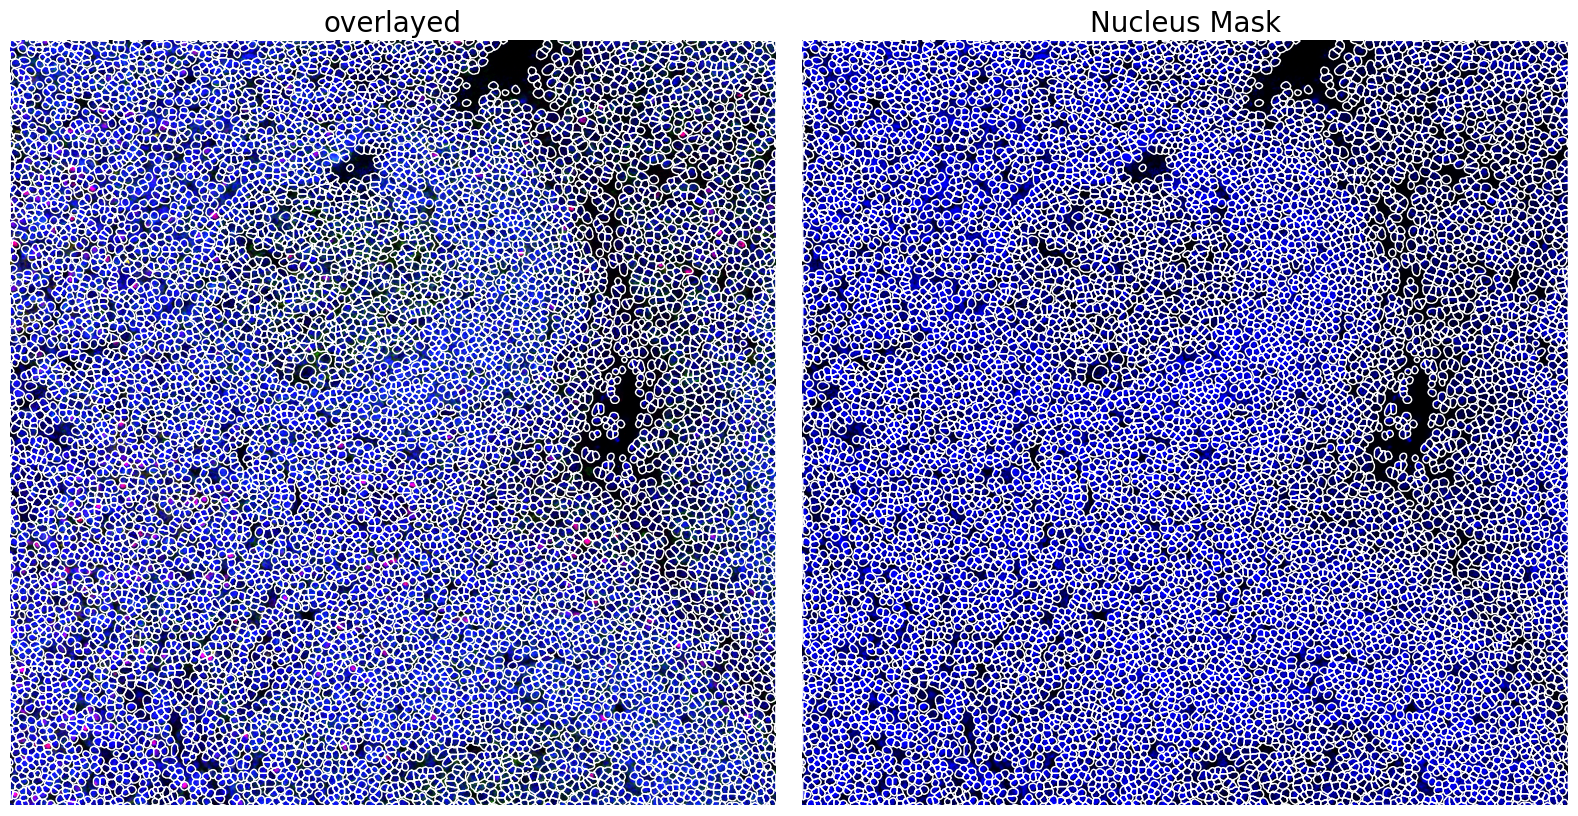

In [6]:
project.plot_segmentation_masks()

In [7]:
project.extract()

version mismatch: detected: RasterFormatV02, requested: FormatV04
version mismatch: detected: RasterFormatV02, requested: FormatV04
version mismatch: detected: RasterFormatV02, requested: FormatV04
version mismatch: detected: RasterFormatV02, requested: FormatV04
version mismatch: detected: RasterFormatV02, requested: FormatV04
version mismatch: detected: RasterFormatV02, requested: FormatV04
version mismatch: detected: RasterFormatV02, requested: FormatV04


[10/09/2025 15:07:25] Initialized temporary directory at /Users/sophia/Documents/GitHub/scportrait_manuscript/input_data/CODEX_tonsil_healthy_tonsilitis/processing_notebooks/HDF5CellExtraction_32g97lwn for HDF5CellExtraction
[10/09/2025 15:07:25] Created new directory for extraction results: /Users/sophia/Documents/GitHub/scportrait_manuscript/input_data/CODEX_tonsil_healthy_tonsilitis/processed_data/scportrait_project_codex_region1/extraction/data
[10/09/2025 15:07:25] Setup output folder at /Users/sophia/Documents/GitHub/scportrait_manuscript/input_data/CODEX_tonsil_healthy_tonsilitis/processed_data/scportrait_project_codex_region1/extraction/data
[10/09/2025 15:07:25] Found 1 segmentation masks for the given key in the sdata object. Will be extracting single-cell images based on these masks: ['seg_all_nucleus']
[10/09/2025 15:07:25] Using seg_all_nucleus as the main segmentation mask to determine cell centers.
[10/09/2025 15:07:25] A total of 20 cells were too close to the image bor

[10/09/2025 15:07:34] Finished transferring data to memory mapped arrays. Time taken: 8.84 seconds.
[10/09/2025 15:07:34] Using batch size of 989 for multiprocessing.
[10/09/2025 15:07:34] Running in multiprocessing mode with 20 threads.


Extracting cell batches:   0%|          | 0/20 [00:00<?, ?it/s]

[10/09/2025 15:07:47] Finished extraction in 13.33 seconds (1483.79 cells / second)


[10/09/2025 15:07:48] Benchmarking times saved to file.
[10/09/2025 15:07:48] Cleaned up temporary directory at <TemporaryDirectory '/Users/sophia/Documents/GitHub/scportrait_manuscript/input_data/CODEX_tonsil_healthy_tonsilitis/processing_notebooks/HDF5CellExtraction_32g97lwn'>


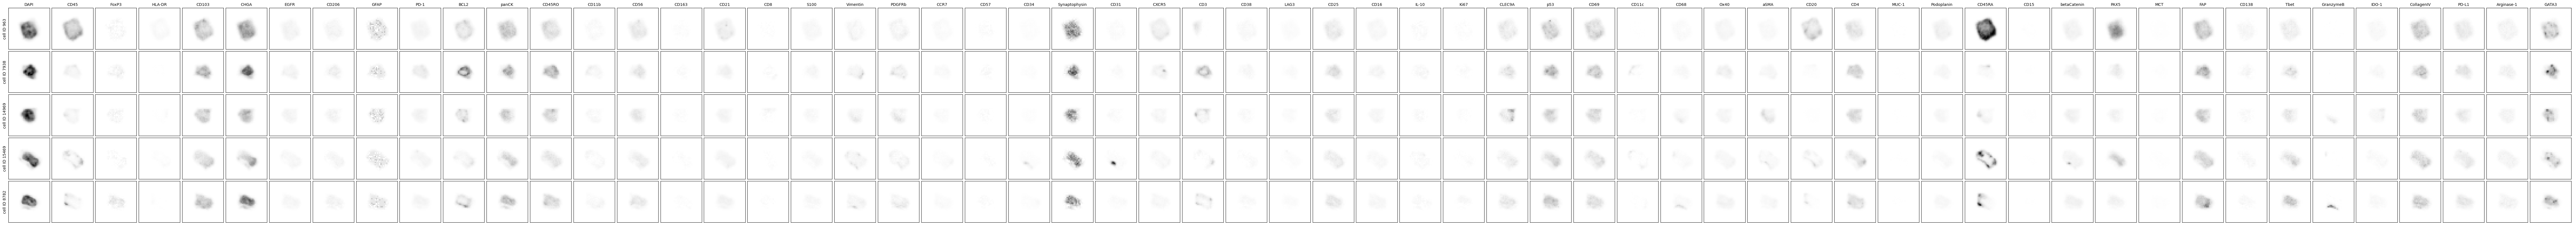

In [8]:
project.plot_single_cell_images(cmap = "Grays", 
                                select_channel = project.channel_names)

In [9]:
project.featurize(overwrite = True)

Using extraction directory: /Users/sophia/Documents/GitHub/scportrait_manuscript/input_data/CODEX_tonsil_healthy_tonsilitis/processed_data/scportrait_project_codex_region1/extraction/data/single_cells.h5sc
[10/09/2025 15:07:50] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./CellFeaturizer_8nx19evc for CellFeaturizer
[10/09/2025 15:07:50] Started CellFeaturization of all available channels.
[10/09/2025 15:07:50] Overwrite flag is set, deleting existing directory for featurization results.
[10/09/2025 15:07:50] Created new directory for featurization results: /Users/sophia/Documents/GitHub/scportrait_manuscript/input_data/CODEX_tonsil_healthy_tonsilitis/processed_data/scportrait_project_codex_region1/featurization/complete_CellFeaturizer_all
[10/09/2025 15:07:50] Automatically configured inference device to mps
[10/09/2025 15:07:50] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./CellFeaturizer_lhtq6azj for Cell

[10/09/2025 15:07:59] Results saved to file: /Users/sophia/Documents/GitHub/scportrait_manuscript/input_data/CODEX_tonsil_healthy_tonsilitis/processed_data/scportrait_project_codex_region1/featurization/complete_CellFeaturizer_all/calculated_image_features.csv
[10/09/2025 15:07:59] Table CellFeaturizer_all_nucleus written to sdata object.
[10/09/2025 15:07:59] GPU memory before performing cleanup: {'MPS': '2268.15625 MiB'}


[10/09/2025 15:08:00] GPU memory after performing cleanup: {'MPS': '60.15625 MiB'}
[10/09/2025 15:08:00] Cleaned up temporary directory at <TemporaryDirectory '/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./CellFeaturizer_lhtq6azj'>
